<a href="https://colab.research.google.com/github/Wonderman01/ztm-proj/blob/main/End-End%20-Multi-class%20Dog-Breed%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **End-to-end Multi-class Dog-Breed Classification**

This noteebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

1. Problem
Identifying the breed of a dog given an image of a dog.

2. Data
The data we're using is from Kaggle's dog breed-identification competition.

https://www.kaggle.com/competitions/dog-breed-identification/data

3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

4. Features

Some information about data:
* We're dealing with images(unstructured data) so it's probably best we use deeep learning/transfer learning.
* There are 120 breeds of dogs(this means there are 120 different classes).
* There are around 10,000+ images in thee traning set(these images have labels).
* There are around 10,000+ images in the test set(these images have no labels, because we'll want to predict them).

In [ ]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog_vision/"


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print("TF Version :" , tf.__version__)
print("TF_Hub Version :" , hub.__version__)


TF Version : 2.15.0
TF_Hub Version : 0.16.1


 Note : We're running this notebook on collab's T4 GPU

In [ ]:
# checking out the label dataset
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog_vision/labels.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# checking the number of images of each breed
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

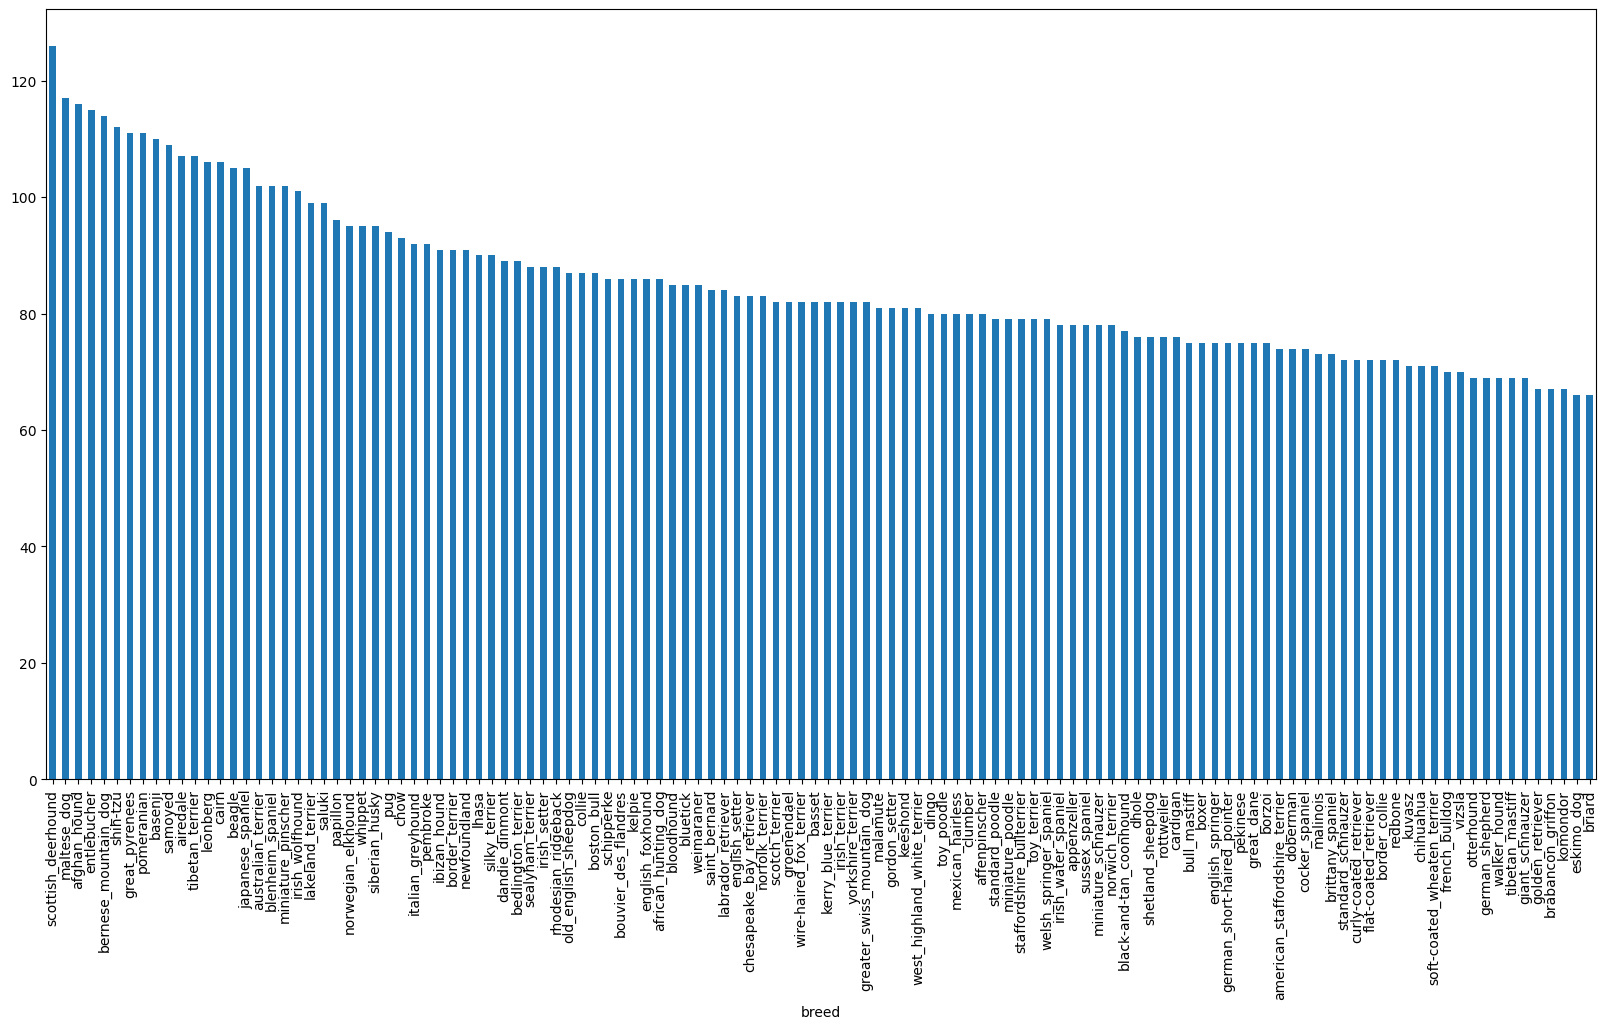

In [ ]:
#A plot to visualise this
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()
# this implying we have an average of 82 images per class

82.0

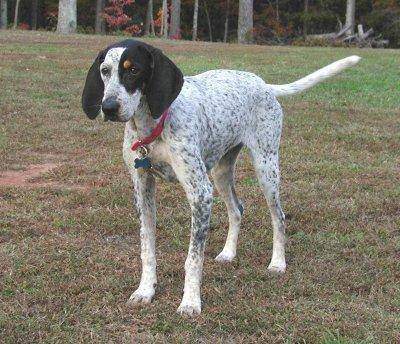

In [ ]:
# Viewing an image
from IPython.display import Image
import PIL.Image
Image("drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")



In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/dog_vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# check the first 10
filenames[:10]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# to check whether number filenames matches number of actual image files
import os
if len (os.listdir("drive/MyDrive/dog_vision/train")) == len(filenames):
  print("Filenames match actual amount of files in folder, Success.")
else:
  print("Filenames do not match actual amount of files in folder, check the target directory.")

Filenames match actual amount of files in folder, Success.


In [ ]:
len(filenames)

10222

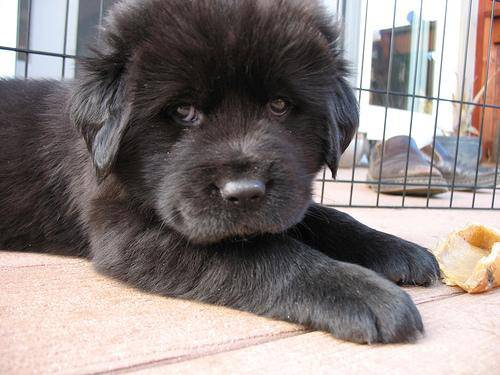

In [ ]:
Image(filenames[10012])

In [ ]:
labels_csv["breed"][10012]

'tibetan_mastiff'

Since we've gotten the training image file path in a list , let's work on coverting the labels

In [ ]:
import numpy as np
labels = labels_csv["breed"] .to_numpy()
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# To check if number  of labels matches the number of filernames
if len(labels) == len(filenames):
  print("Number of filenames matches labels")
else:
  print("Numbers of filenames and labels don't mmatch")

Number of filenames matches labels


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn alll label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
 len(boolean_labels)

10222

In [ ]:
# Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where labels occur
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #let there be a 1 where the smaple label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our validation set
kaggle's provided data doesn't provide a validation test hence we'd create ours

In [ ]:
# Setup X and y variables

X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

Since working with the enitre 10222 rows might be cumbersome ,We begin by experimenting 1000 images and increasing as we  move on

In [ ]:
# set number of images for experimenting
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max: 10000, step:1000}

In [ ]:
# Split data into train and validation
from sklearn.model_selection import train_test_split

# Split them into training and valudartion of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# A qucik view on the training data
X_train[:5], y_train[:5]

(['drive/MyDrive/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/dog_vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/dog_vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/dog_vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing Images(turnning images into Tensors)

To preprocess our images into Tesnors we'd write a function which does the following :
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable , `image`
3. Turn our `image` (a jpg) into Tesnors
4. Resize the `image` to be a shape of (224, 224)
5.Return the modified `image`

Before we do, let's see what importing an image looks like


In [ ]:
# Convert image into Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[69])
image.shape

(375, 500, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[4, 3, 0],
        [7, 6, 2],
        [9, 8, 4],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[4, 3, 0],
        [3, 2, 0],
        [1, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)>

Now, we've seen what an image looks like as a Tensor, let's make a function to preprocess them .

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable , `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image channels (convert colour channels from 0-255 to 0-1)
4. Resize the `image` to be a shape of (224, 224)
5.Return the modified `image`

In [ ]:
# Define image size
IMG_SIZE =224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image to a Tensor
  """
  #Read in an image file
  image = tf.io.read_file(image_path)
  # Turn jpg images inpt numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize the image to be a shape of (224,224)
  image = tf.image.resize(image, size =[IMG_SIZE, IMG_SIZE])
  # retun the modified image
  return image

## Turning our data into batches

The idea behind this is basically considering memory and the number of images to be processed.

Here we do about 32 images at a time.

We need our data in Tensor Tuples towork effectively



In [ ]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[51]), tf.constant(y[51]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.97364324, 0.9187413 , 0.9187413 ],
         [0.9784752 , 0.92357326, 0.92357326],
         [0.9748337 , 0.91993177, 0.91993177],
         ...,
         [0.21722774, 0.16624735, 0.20154147],
         [0.22580205, 0.19749998, 0.2631454 ],
         [0.16543259, 0.14388935, 0.22161257]],
 
        [[0.9631128 , 0.9082108 , 0.9082108 ],
         [0.9685771 , 0.9136751 , 0.9136751 ],
         [0.96827215, 0.9133702 , 0.9133702 ],
         ...,
         [0.23927341, 0.18829302, 0.22358714],
         [0.1888466 , 0.15793137, 0.21731307],
         [0.23083757, 0.19843361, 0.26834556]],
 
        [[0.95266986, 0.8977679 , 0.8977679 ],
         [0.9614234 , 0.90652144, 0.90652144],
         [0.96470594, 0.909804  , 0.909804  ],
         ...,
         [0.1688754 , 0.11789501, 0.15318912],
         [0.19458547, 0.14876089, 0.19947876],
         [0.3124491 , 0.2666245 , 0.32399496]],
 
        ...,
 
        [[0.9921569 , 0.9843138 

In [ ]:
# Define the batch size, we begin with 32
BATCH_SIZE = 32

# Create a function to turn the data into batches
def create_data_batches(X, y=None, batch_size= BATCH_SIZE, valid_data = False, test_data= False ):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it is traninig data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels)
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # only file paths no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

    # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    # Check if 'name' has been overwritten
    if 'name' in globals() and isinstance(name, np.ndarray):
      print("Warning: 'name' variable is a NumPy array. This might be causing issues.")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                                tf.constant(y)), name='validation_data') # labels, explicitly name the dataset
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    #Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    #Create (image, label) tuples(this also urns the image into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Data already in batches , hwoever, we try to visualize to make comprehension easy

  

In [ ]:
import matplotlib.pyplot as plt

# Create a function fo viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=( 10, 10))
  #Loop through 25( for displaying 25 images )
  for i in range (25):
    # Create subplots(5 rows, 5 columns)
    ax= plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the imagelabel as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")



In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#this process is done entirely to unbatch our data by converting it into a numpy iterator
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.41014603, 0.26112643, 0.25720486],
          [0.45000488, 0.30098525, 0.29706368],
          [0.49792552, 0.3489059 , 0.34498432],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.4229017 , 0.27388206, 0.2699605 ],
          [0.4304006 , 0.28138098, 0.2774594 ],
          [0.44724074, 0.2982211 , 0.29429954],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.4179032 , 0.26350895, 0.26227468],
          [0.41249818, 0.25810388, 0.25686964],
          [0.44500777, 0.2906135 , 0.28937927],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.33422157, 0.2950059 , 0.28716275],
          [0.33066

In [ ]:
len(train_images), len(train_labels)

(32, 32)

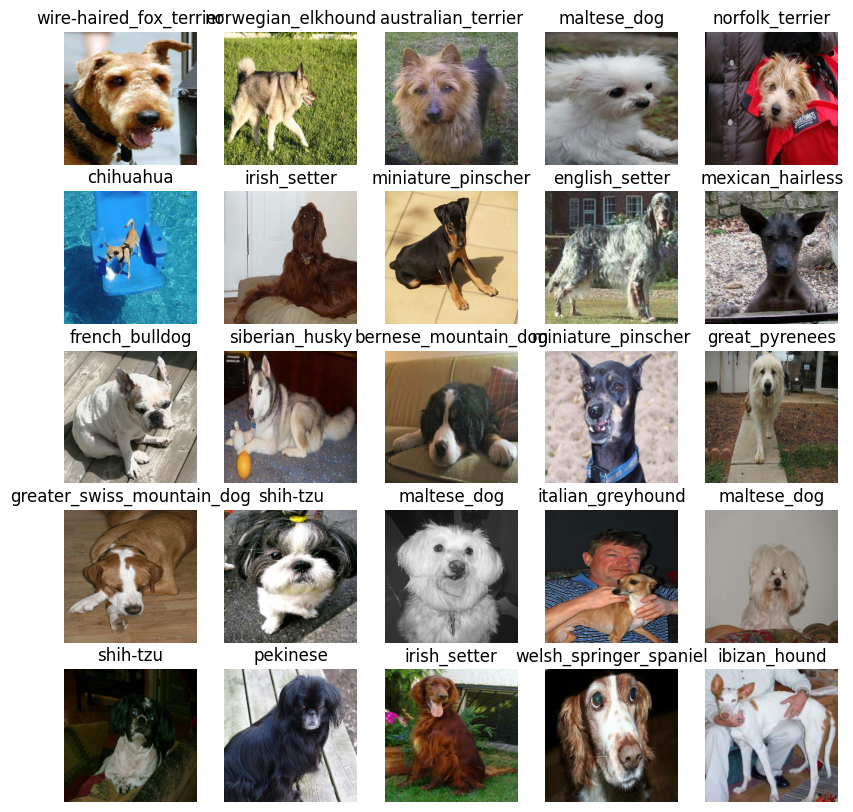

In [ ]:
 # Now let's visualize the data in a training batch
 show_25_images(train_images, train_labels)

 # we notice the images shuffle for every time we run this same cell because we intitiated it when creating the batches for the training data

In [52]:
# Lets visualize for the validation data set
val_images, val_labels = next(val_data.as_numpy_iterator())
val_images, val_labels

(array([[[[0.29599646, 0.43284872, 0.3056691 ],
          [0.26635826, 0.32996926, 0.22846507],
          [0.31428418, 0.27701408, 0.22934894],
          ...,
          [0.77614343, 0.82320225, 0.8101595 ],
          [0.81291157, 0.8285351 , 0.8406944 ],
          [0.8209297 , 0.8263737 , 0.8423668 ]],
 
         [[0.2344871 , 0.31603682, 0.19543913],
          [0.3414841 , 0.36560842, 0.27241898],
          [0.45016077, 0.40117094, 0.33964607],
          ...,
          [0.7663987 , 0.8134138 , 0.81350833],
          [0.7304248 , 0.75012016, 0.76590735],
          [0.74518913, 0.76002574, 0.7830809 ]],
 
         [[0.30157745, 0.3082587 , 0.21018331],
          [0.2905954 , 0.27066195, 0.18401104],
          [0.4138316 , 0.36170745, 0.2964005 ],
          ...,
          [0.79871625, 0.8418535 , 0.8606443 ],
          [0.7957738 , 0.82859945, 0.8605655 ],
          [0.75181633, 0.77904975, 0.8155256 ]],
 
         ...,
 
         [[0.9746779 , 0.9878955 , 0.9342279 ],
          [0.99153

In [ ]:
len(val_images), len(val_labels)

(32, 32)

In [ ]:
show_25_images(val_images, val_labels)

## Building a model

Before we build a model , we consider this threee criterias:
 * The input shape (our images shape in the form of Tensors) to our model
 * The output shape(image labels, in the form of Tensors) of our model
 * The URL of the model we want to use

In [53]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlowHub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

Having gotten our inputs, outputs and model ready
We uitilize a Keras deep learning model

We then create a function to :
* Take the input shape, output shape and the model chosen as parameters.
* Defines the layers in a keras model in sequential fashion(linearlly).
* Compiles the model (sayas it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting)
* Returns the model



In [54]:
 # Create a function which builds a keras model
 def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")  # Layer 2 (output layer)

])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
)

# Build the model
  model.build(INPUT_SHAPE)

  return model









In [55]:
model = create_model()
model.summary()

Building model with: https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Creating Tensor Callbacks
 To setup Tensor Callbacks we carry out these steps :
 1. Load the TensorBoard notebook extension.
 2. Create a TensorBoard callback which is able to save logs to a directory and pass it to ourf model's `fit()` function
 3. Visualize our model's training logs with `%Tensorboard` magic function.(after model training)

In [ ]:
# load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import os
import datetime

def create_tensor_callback():
  # create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/dog_vision/logs",
                        # to make the logs tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # Use strftime to format datetime object
  return tf.keras.callbacks.TensorBoard(log_dir=logdir) # Assuming you want to return a TensorBoard callback

### Early Stopping Callback
Early stopping helps our model from overfitting by stopping training if our acuracy metric stops improving .

In [ ]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor ="val_accuracy",
                                                  patience=3)

## Training a model (on the subset of data)

Our first model is only going to train on 1000 images to make sure everything works.


In [ ]:
NUM_EPOCHS = 20 #@param {type:"slider", min:10, max:100, step:10}

Let's create a function which trains a model.
* Create a model using `create_model()`
* Sertup a TensorBoard callback using `create_tensor_callback()`
* Train the model using `model.fit()`, passing in the training data, validation data and number of epochs to train for and callbacks to use.
* Return the model

In [56]:
# Building a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensor_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model


In [57]:
# Fit the model to the data
#model = train_model()

### TensorBoard logs
The TesnorBoard function`(%tensorbaord)` will acces the log directory we creteed earlier and visualize its contents

In [ ]:
#%tensorboard --logdir drive/MyDrive/dog_vision/logs


In [ ]:
val_data

In [62]:
### Mmaking and evaluating predctions using a trained model
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 24s 3s/step


In [64]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[0])

In [65]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Paredicted label: {unique_breeds[np.argmax(predictions[index])]}")

[0.01430758 0.00141176 0.00511015 0.0036803  0.00629725 0.00084524
 0.00517786 0.00241052 0.07921208 0.00239032 0.01822365 0.00313688
 0.03385618 0.00314978 0.00295062 0.00505022 0.00142223 0.00037824
 0.00532413 0.00405332 0.00369367 0.00030763 0.00374584 0.00596063
 0.01837054 0.01952634 0.00477229 0.00499806 0.00101704 0.000808
 0.0021577  0.06712125 0.00273367 0.00470447 0.00283014 0.00231593
 0.00406993 0.00192457 0.0066916  0.00099476 0.00073436 0.00353706
 0.01189871 0.00060375 0.0081934  0.0026596  0.00283532 0.0015158
 0.00200378 0.00063575 0.01331114 0.01188464 0.0030978  0.00453874
 0.01148383 0.00315592 0.02814139 0.00359539 0.03095176 0.00394108
 0.00315212 0.00153279 0.00923494 0.00147502 0.00365423 0.0009189
 0.00124993 0.00381513 0.00207416 0.00030675 0.00110121 0.02557368
 0.01558971 0.00089143 0.0040268  0.08531376 0.00533648 0.00935872
 0.00223239 0.00173764 0.00791424 0.00253424 0.00693542 0.00178854
 0.00934074 0.00147706 0.01312866 0.00563996 0.00266914 0.00963749

In [ ]:
unique_breeds

We try to replicate the same thing but this time with images which would be much better
Note: Prediction probabilities aere also confidence levels

In [66]:
# Turn prediction probabilities into their respective label (easier to understaand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilties into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]


# Geat a predicted label based on an array of prediction probabilites
pred_label = get_pred_label(predictions[53])
pred_label

'scotch_terrier'

Since our validation data is still in a batch dataset, we'll have to unbatchify it to make preidctions on the validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
val_data

In [ ]:
# Create a function to unbatch the dataset
def unbatchify(data):
  """
  Takes a batched dataset of(image, label) Tensors and returns separate arrays of images and labels
  """
  images =[]
  labels =[]
  #Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(predictions[0])

Now we've got ways to get :
* Prediction labels
* Validation labels
* Validation images

We'd create some functions to aid visualizations


We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  #Plot the image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title dpepending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be preicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}" .format(pred_label,
                                     np.max(pred_prob)* 100,
                                     true_label),
                                     color =color)





In [ ]:
plot_pred(prediction_probabilities =predictions,
           labels = val_labels,
           images = val_images,
           n =77)

We make another function to view our models top 10 predictions

This function will:
* Take an input of prediction probabilities array, a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels

* Plot the top 10 prediction probabilities values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  PLot the top 10 highest prediction confidence along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  #Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction cofidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  #Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation ="vertical")

  # Change color of  true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 9)

In [ ]:
#predictions[0][predictions[0].argsort()[-10:][::-1]]
#predictions[0].max()
#unique_breeds[predictions[0].argsort()[-10:][::-1]]

 We then create a function to help us visualize our predictions and evaluate our model.

In [ ]:
# we check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels = val_labels,
            images = val_images,
            n = i+ i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = val_labels,
                 n= i + i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and reloading a trained  model

In [ ]:
# Ccreate a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  model_dir = os.path.join("drive/MyDrive/dog_vision/model",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = model_dir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)

In [ ]:
# Creating a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model =  tf.keras.models.load_model(model_path,
                                    custom_objects ={"KerasLayer":hub.KerasLayer})
  return model

### Practice use case

In [ ]:
#Save our model trsined on 1000 images
save_model(model, suffix="1000_images-Adam")

NameError: name 'datetime' is not defined

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model("/content/drive/MyDrive/dog_vision/model/20240630-161647-1000_images-Adam.h5")

Loading saved model from: /content/drive/MyDrive/dog_vision/model/20240630-161647-1000_images-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

#### Training our model (on the full data)

In [ ]:
len(X), len(y)

In [ ]:
# Create a data batch with the full data
full_data = create_data_batches(X,y)

In [ ]:
full_data

In [ ]:
# Create a model for full model
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensor_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "acuracy",
                                                             patience =3)

Note: running the cell below would take a little while because the GPU in the runtime has to load all of the images in memory

In [ ]:
# Fit the full model to the full data
#full_model.fit(x=full_data,
         #    epochs= NUM_EPOCHS,
         #    callbacks=[full_model_tensorboard, full_model_early_stopping ])

In [ ]:
saved_model = save_model(full_model, suffix="full_model-Adam")

In [ ]:
loaded_full_model = load_model("drive/MyDrive/dog_vision/model/20240707-192714-full_model-Adam.h5")
loaded_full_model

Loading saved model from: drive/MyDrive/dog_vision/model/20240707-192714-full_model-Adam.h5


## Making predictions on the test dataset

Since the model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

We already created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True`(since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on the model.

In [ ]:
# Load the test image filenames
import os
test_path = "drive/MyDrive/dog_vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/dog_vision/test/e70dfb4bf50f74850463cfd35edc8af5.jpg',
 'drive/MyDrive/dog_vision/test/def88eeacc633cbc3d46d5f5fb495379.jpg',
 'drive/MyDrive/dog_vision/test/e5b13519aa192a386dc0c5dd7d096e70.jpg',
 'drive/MyDrive/dog_vision/test/e520e4cd7608c47cd9017bb87e88f334.jpg',
 'drive/MyDrive/dog_vision/test/e7fcdf9671a6593b638cbee42842f981.jpg',
 'drive/MyDrive/dog_vision/test/e610bd621c660546f7cd1cd6554a5caf.jpg',
 'drive/MyDrive/dog_vision/test/e48f3d4f0514a07f4777a30f01d32ea9.jpg',
 'drive/MyDrive/dog_vision/test/e0e3eb01e80b1d694a47b23909e158ec.jpg',
 'drive/MyDrive/dog_vision/test/e800b6c8d2904e205d67ada800907762.jpg',
 'drive/MyDrive/dog_vision/test/e431adb273c1b705e6e85147990f355e.jpg']

In [ ]:
import os
if len (os.listdir(test_path)) == len(test_filenames):
  print("Filenames match actual amount of files in folder, Success.")
else:
  print("Filenames do not match actual amount of files in folder, check the target directory.")

Filenames match actual amount of files in folder, Success.


The reason I had to do this was because of an error encountered when i was trying to predict on the test data.

I relaized that some of the file paths were not consistent/ rather the test_paths to the image didn't exist.

In [ ]:
# Create test data batches
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches ...


Note: Calling the `predict()` on our full model and passing it the test data batch will take a while.

In [ ]:
# Make predictions on test data using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 1057s 3s/step


In [ ]:
# save predictions(Numpy array) to csv file (for access later)
np.savetxt("drive/MyDrive/dog_vision/preds_array.csv",test_predictions, delimiter = ",")

In [ ]:
# Load predictions(NumPy array) from csv  file
test_predictions = np.loadtxt("drive/MyDrive/dog_vision/preds_array.csv", delimiter = ",")

In [ ]:
test_predictions[:10]

array([[7.49947491e-27, 2.23599215e-27, 9.92135290e-22, ...,
        2.20673087e-21, 2.53916402e-23, 1.18660661e-28],
       [1.22492272e-21, 8.69057329e-15, 6.86010288e-18, ...,
        1.43127440e-13, 4.07975320e-11, 4.08534324e-15],
       [3.24148542e-25, 6.51188979e-24, 7.07128605e-24, ...,
        5.84932167e-17, 3.56924572e-22, 4.39053171e-22],
       ...,
       [7.70828437e-18, 7.02640257e-14, 8.06713054e-17, ...,
        1.51162516e-14, 6.98308686e-18, 2.97243036e-19],
       [3.30465440e-20, 3.40315944e-29, 3.79748441e-21, ...,
        1.63854097e-07, 2.97445445e-14, 8.20343529e-21],
       [3.31274423e-13, 1.19109045e-14, 7.12346456e-21, ...,
        9.49396306e-21, 1.35730762e-15, 7.71532157e-15]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Looking at Kaggle's sample submission, we find that it wants our models prediction proability outputs in a DataFrame with an ID and a column for each different dog breed.


To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dogbreed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data(the prediction proabilities) to eac of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
["id"] + list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [ ]:
# Create a pandas Dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] +list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to prediction DataFrame
test_ids =[os.path.splitext(path)[0] for path  in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
# Add the prediction probabiltiies to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e70dfb4bf50f74850463cfd35edc8af5,7.499475e-27,2.235992e-27,9.921353e-22,3.145795e-26,1.769991e-26,2.143708e-26,1.196654e-26,6.261875e-16,2.421715e-14,...,6.276910e-26,3.288143e-22,4.565905e-28,2.293823e-29,2.784067e-33,8.163082e-28,1.735878e-30,2.206731e-21,2.539164e-23,1.186607e-28
1,def88eeacc633cbc3d46d5f5fb495379,1.224923e-21,8.690573e-15,6.860103e-18,1.829252e-18,6.605355e-18,5.501958e-24,5.687974e-14,6.561985e-17,3.311029e-09,...,2.596573e-12,1.820264e-19,8.655917e-26,5.271903e-23,1.351062e-24,1.617437e-15,2.096269e-13,1.431274e-13,4.079753e-11,4.085343e-15
2,e5b13519aa192a386dc0c5dd7d096e70,3.241485e-25,6.511890e-24,7.071286e-24,6.123820e-17,4.657268e-23,1.799423e-09,2.122548e-22,1.968597e-25,1.482310e-20,...,4.783076e-20,7.981783e-26,5.403473e-23,5.138029e-14,1.757913e-18,1.865925e-21,8.789635e-21,5.849322e-17,3.569246e-22,4.390532e-22
3,e520e4cd7608c47cd9017bb87e88f334,1.312697e-04,6.986510e-20,7.388509e-23,3.891952e-25,1.133154e-18,1.446480e-20,6.699522e-25,5.551504e-21,2.260274e-22,...,1.303063e-06,5.693807e-14,2.131155e-21,1.271273e-17,3.684400e-20,4.386612e-21,2.328436e-14,1.081213e-19,3.652232e-11,2.475879e-12
4,e7fcdf9671a6593b638cbee42842f981,9.336580e-30,3.115527e-30,3.425849e-31,1.556817e-27,4.341207e-27,7.620037e-29,1.233769e-26,4.478822e-28,1.118857e-24,...,1.590785e-33,2.324596e-33,3.338537e-36,1.005243e-24,3.323202e-35,9.999999e-01,6.430142e-29,2.637972e-27,2.810300e-29,1.034448e-35


In [ ]:
# Save our predictions dataframe to CSV for submissioon to Kaggle
preds_df.to_csv("drive/MyDrive/dog_vision/full_model_predictions_submission_1_mobilenetV2.csv",
               index= False)

## Making Predictions on Custom images

To make predictions on custom images, we'l:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `create_data_batches()` and set `test_data` parameter to `True`
* Pass the custom image date to our model's `predict()` method
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images






In [72]:
# Get custom image filepaths
custom_path = "drive/MyDrive/dog_vision/friends_dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [80]:
custom_image_paths

['drive/MyDrive/dog_vision/friends_dogs/K_dog.jpg',
 'drive/MyDrive/dog_vision/friends_dogs/vic_dog.jpg',
 'drive/MyDrive/dog_vision/friends_dogs/k2_dog.jpg',
 'drive/MyDrive/dog_vision/friends_dogs/k3_dog.jpg',
 'drive/MyDrive/dog_vision/friends_dogs/k4_dog.jpg']

In [81]:
#Turn custom iamges into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)

Creating test data batches ...


In [123]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 306ms/step


In [124]:
custom_preds.shape

(5, 120)

In [165]:
d1 = custom_preds[0].tolist()
cp = [i for i in d1]

In [166]:
cp.sort()

In [167]:
cp

[2.4039322629211488e-21,
 6.962007630818039e-21,
 7.723018964245653e-20,
 8.663801201705475e-20,
 1.3230388128858564e-19,
 1.9134279891030695e-19,
 2.708131422855734e-19,
 4.672738627421108e-19,
 7.409782597624984e-19,
 1.182229382325209e-18,
 1.5648378455537023e-18,
 1.5725933875794229e-18,
 2.004177974106262e-18,
 2.0748295381759476e-18,
 6.253462683434044e-18,
 6.704534197626561e-18,
 7.200025724303481e-18,
 1.0045672615273706e-17,
 1.163683724158071e-17,
 8.236315445040322e-17,
 8.312765462485943e-17,
 1.14424979395424e-16,
 1.9344575507085154e-16,
 2.167969578841051e-16,
 3.8324222750713553e-16,
 4.137470867810947e-16,
 4.746765224874811e-16,
 6.435113117593853e-16,
 1.5337132402309418e-15,
 3.158304010098087e-15,
 3.381934684216852e-15,
 3.731640918578499e-15,
 8.875540717147041e-15,
 9.275585907805774e-15,
 1.1419659231366903e-14,
 1.1785170041733132e-14,
 1.5817896444709698e-14,
 3.1513854026332666e-14,
 4.6972974419639754e-14,
 5.118209797498087e-14,
 7.867693313252239e-14,
 8

In [168]:
# d1.sort()
index = [d1.index(i) for i in cp]


In [169]:
cpl = [unique_breeds[i] for i in index]

In [170]:
max(cp)

0.9635553956031799

In [171]:
cp[-1]

0.9635553956031799

In [172]:
{breed:score for breed,score in zip(cpl[::-1][:20],cp[::-1][:20])}

{'border_terrier': 0.9635553956031799,
 'golden_retriever': 0.035952989012002945,
 'pug': 0.0003187658730894327,
 'australian_terrier': 4.437004099600017e-05,
 'norwich_terrier': 4.076846016687341e-05,
 'yorkshire_terrier': 3.887286948156543e-05,
 'chihuahua': 2.1544838091358542e-05,
 'redbone': 1.7927597582456656e-05,
 'toy_poodle': 5.599783435172867e-06,
 'kuvasz': 1.1219664202144486e-06,
 'cairn': 9.537427558825584e-07,
 'lakeland_terrier': 3.870219131840713e-07,
 'irish_terrier': 3.7428546306728094e-07,
 'toy_terrier': 2.430672623177088e-07,
 'scottish_deerhound': 2.2464871562988264e-07,
 'otterhound': 1.6286828952161159e-07,
 'bernese_mountain_dog': 1.1013074896482067e-07,
 'brittany_spaniel': 5.630971600112389e-08,
 'soft-coated_wheaten_terrier': 2.5170104223093404e-08,
 'italian_greyhound': 2.1969924546283437e-08}

In [173]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['border_terrier',
 'bull_mastiff',
 'old_english_sheepdog',
 'maltese_dog',
 'maltese_dog']

In [174]:
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

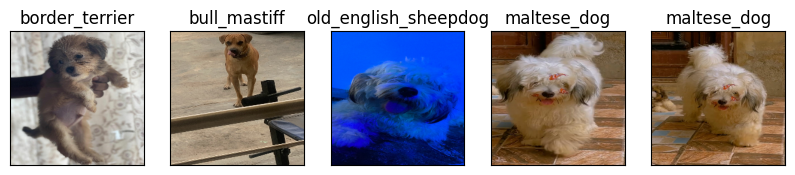

In [175]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)